# Investigating Police Brutality

<li> Overview: Gain some insights from analyzing police shootings from 2015 - 2020 in America</li>

<li>Takeaways: </li>
1. Although most violent encounters with police are with white victims, whenthreatening factors such as mental illness, weapon usage, and threat level are removed, there is a higher percentage of deaths amongst 'non threatening' minorities.
2. Body Cameras do not seem to reduce the possiblity of violence amongst innocent victims, however only 6% of the workforce are camera equiped.
3. CA consistently remains the top state experiencing police violence.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import missingno as msno


/kaggle/input/population-usa-2018/Population_Distribution_by_Race_2018.csv
/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv
/kaggle/input/us-state-race/US_state_race_population.csv


# Exploring the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [3]:
df.describe(include=['O'])
df.nunique()

id                         5416
name                       5206
date                       1844
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2470
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [4]:
df['year_month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
d = {'W' :'White','B' :'Black','H' :'Hispanic'
     ,'A' :'Asian','N' :'Native American','O' :'Other'}
df['race'] =  df['race'].map(d)


,race,age
0,Asian,36.549451
1,Black,32.463893
2,Hispanic,33.589977
3,Native American,31.662338
4,Other,32.978723
5,White,39.947196


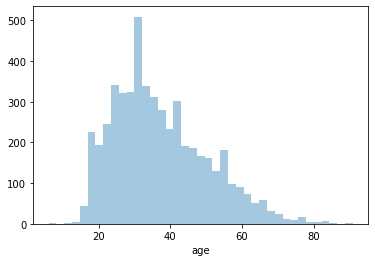

In [5]:
### What is the average age of the victim by race?
sns.distplot(df['age'],kde=False)
df[['race', 'age']].groupby(['race'], as_index=False).mean()

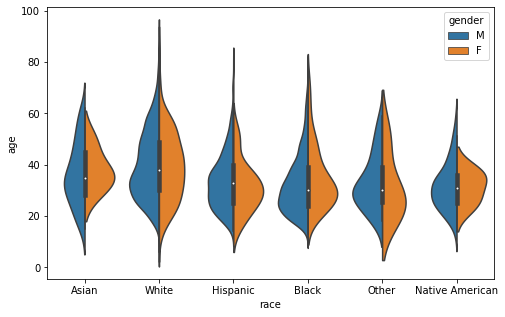

In [6]:
plt.figure(figsize=(8,5))
sns.violinplot(x='race',y='age',data=df,hue='gender',split=True)
### Noticable bump in females shot in both Native American and Asian females.

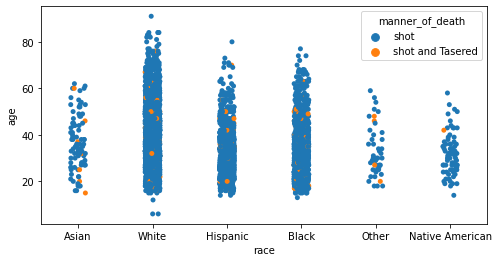

In [7]:
plt.figure(figsize=(8,4))
sns.stripplot(x='race',y='age',data=df,hue='manner_of_death')
### most of the record incidents involved shootings

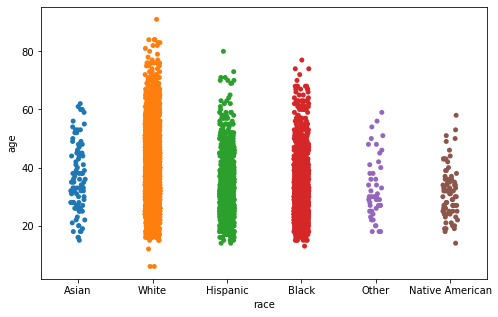

In [8]:
plt.figure(figsize=(8,5))
sns.stripplot(x='race',y='age',data=df)
### The youngest and oldest victims of police shooting were white.

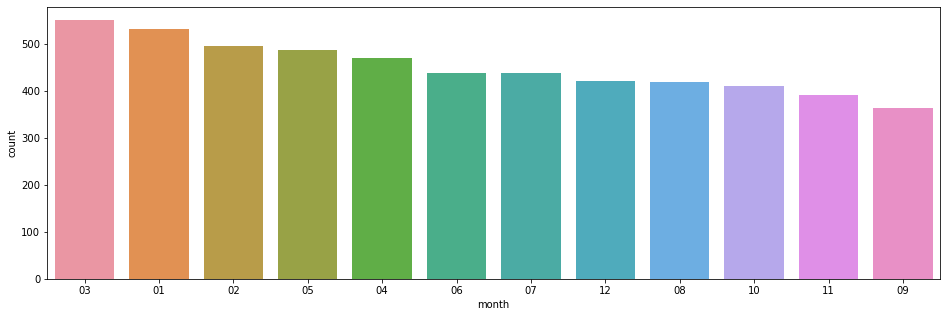

In [9]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['month'],order = df['month'].value_counts().index)
### Top months where shooting were seen are in the beginning of the year. What could be causing this?

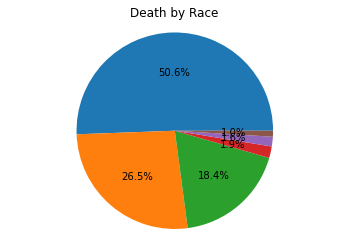

In [10]:
### Whites make up about 50% of victims of police brutality
plt.pie(df['race'].value_counts(),autopct='%1.1f%%')
plt.title('Death by Race')
plt.axis('equal')
plt.show()


# Dealing with Nulls

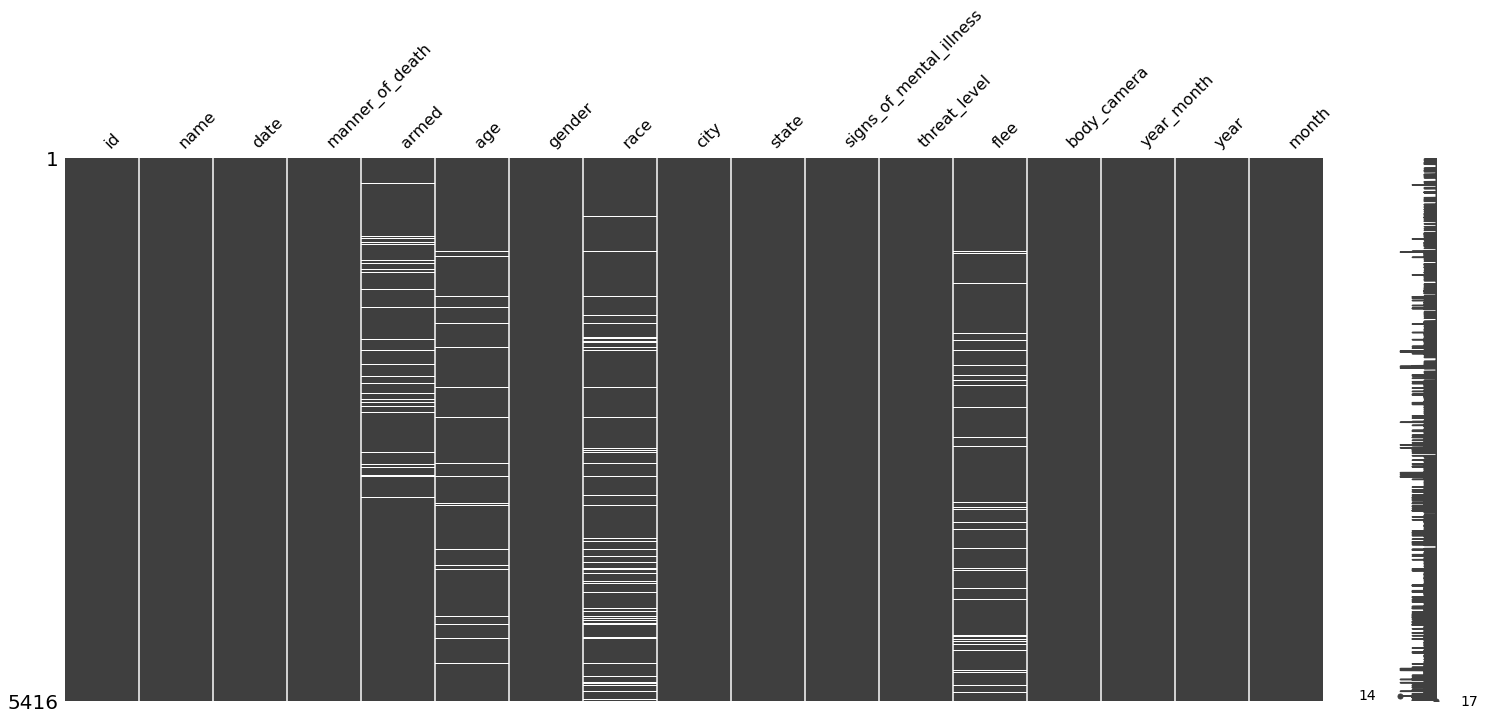

In [11]:
df.isnull().sum()
msno.matrix(df)

In [12]:
missing_percentage=df.isna().sum()*100/df.shape[0]
missing_percentage

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
year_month                 0.000000
year                       0.000000
month                      0.000000
dtype: float64

In [13]:
df.dropna(inplace=True)

* Nulls were found in Armed, Age, Race, and Flee column. Since the proportion missing is a small amount, we will drop rows where nulls were found.

# Variance in the Data

In [14]:
cardinality ={}
for col in df.columns:
    cardinality[col] = df[col].nunique()
cardinality

{'id': 4399,
 'name': 4377,
 'date': 1733,
 'manner_of_death': 2,
 'armed': 90,
 'age': 75,
 'gender': 2,
 'race': 6,
 'city': 2116,
 'state': 51,
 'signs_of_mental_illness': 2,
 'threat_level': 3,
 'flee': 4,
 'body_camera': 2,
 'year_month': 66,
 'year': 6,
 'month': 12}

In [15]:
#Since there are 90 different types of weapons listed, 
#some weapons listed are not life threatening such as 'barstool' 
#and so I am re-classifying weapons between life threatening weapons and non-harmful objects.
df['armed'].unique()
l = ['gun', 'pole and knife', 'box cutter', 'flagpole', 'metal pole', 'baseball bat and fireplace poker', 
     'gun and knife', 'chain saw', 'hatchet and gun', 'crowbar', 'fireworks', 'pellet gun', 'samurai sword', 
     'vehicle and gun', 'grenade', 'Airsoft pistol', 'ice pick', 'machete and gun', 'baseball bat and bottle', 
     'BB gun', 'gun and vehicle', 'vehicle and machete', 'knife and mace', 'hatchet', 'guns and explosives', 
     'Taser', 'gun and sword', 'incendiary device', 'sword', 'crossbow', 'spear', 'bayonet', 'machete', 'knife', 
     'pick-axe', 'gun and car', 'vehicle', 'motorcycle', 'car', 'bow and arrow','unknown weapon', 'BB gun and vehicle', 
     'baseball bat and knife', 'claimed to be armed']

In [16]:
df['true_weapon'] = np.where(df['armed'].apply(lambda x: any([k in str(x) for k in l])),'weapons','non_weapons')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year_month,year,month,true_weapon
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015-01,2015,01,weapons
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,2015-01,2015,01,weapons
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015-01,2015,01,non_weapons
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,2015-01,2015,01,non_weapons
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015-01,2015,01,weapons


# Looking at Death without Reasonable Cause

In [17]:
### if we remove all factors that can make a victim look threatening, maybe we can identify those deaths that were lead by racial bias.
df['threatening_appearance'] = np.where( ( (df['signs_of_mental_illness'] == True) | (df['threat_level'] == 'attack' ) | (df['flee'] == 'Car' ) |  (df['true_weapon'] == 'weapons' ) ) , 'Appears Threatening', 'No Threat')
df.tail()
# df.shape

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year_month,year,month,true_weapon,threatening_appearance
5408,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,2020-06,2020,06,weapons,Appears Threatening
5409,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,2020-06,2020,06,weapons,Appears Threatening
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,2020-06,2020,06,weapons,Appears Threatening
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,2020-06,2020,06,weapons,Appears Threatening


In [18]:
innocent = df[df["threatening_appearance"]=='No Threat']
innocent.tail()
# innocent.shape

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year_month,year,month,true_weapon,threatening_appearance
5389,5896,Sean Monterrosa,2020-06-02,shot,hammer,22.0,M,Hispanic,Vallejo,CA,False,other,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat
5394,5905,Scott Anderson Hutton,2020-06-03,shot,undetermined,36.0,M,White,Alexander,AR,False,undetermined,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat
5397,5900,Erik Salgado,2020-06-06,shot,undetermined,22.0,M,Hispanic,Oakland,CA,False,undetermined,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat
5407,5915,Michael Thomas,2020-06-11,shot,undetermined,62.0,M,Black,Lancaster,CA,False,undetermined,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat
5410,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,2020-06,2020,06,non_weapons,No Threat


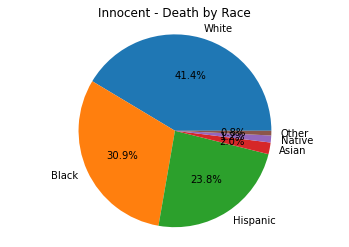

In [19]:
### The gap in percentage of deaths is closing in when looking at the 'innocent' sample
labels = ['White', 'Black', 'Hispanic', 'Asian','Native','Other']
plt.pie(innocent['race'].value_counts(),autopct='%1.1f%%',labels=labels)
plt.title('Innocent - Death by Race')
plt.axis('equal')
plt.show()

In [20]:
prop = pd.crosstab(df['race'],df['threatening_appearance'])
# prop = prop.sort_values('No Threat', ascending=False)
prop = prop.nlargest(6, 'No Threat')
prop

threatening_appearance,Appears Threatening,No Threat
race,,
White,2147,106
Black,1085,79
Hispanic,725,61
Asian,78,5
Native American,67,3
Other,41,2


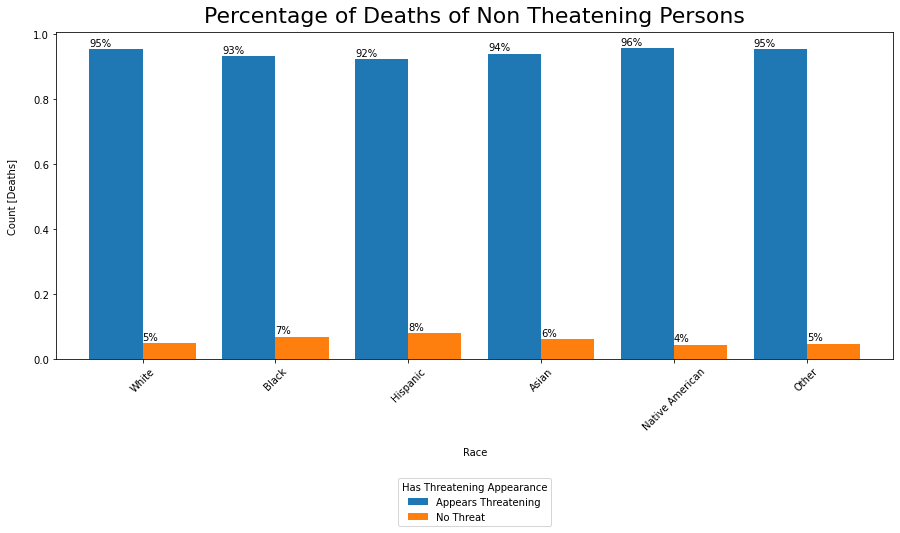

In [21]:
# plt.figure(figsize=(10,5))
# ax = sns.countplot(x='race', hue="threatening_appearance", data=df)
### Drawing a distinction in percentage of deaths on 'non-threating' victims. Innocent Blacks and Hispanics see the largest proportion of violence from police.
ax = (prop.div(prop.sum(1), axis=0)).plot(kind='bar',figsize=(15,6),width = 0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.legend(title='Has Threatening Appearance',loc=9, bbox_to_anchor=(.5, -0.35))

plt.title("Percentage of Deaths of Non Theatening Persons", y=1.013, fontsize=22)


plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Race', labelpad=16)
plt.ylabel(ylabel = 'Count [Deaths]', labelpad=16)
plt.show()

,weapon,fled,body_camera,signs_of_mental_illness,race,Has_threatening_appearance
0,True,False,False,True,Asian,True
1,True,False,False,False,White,True
2,False,False,False,False,Hispanic,False
3,False,False,False,True,White,True
4,True,False,False,False,Hispanic,True
...,...,...,...,...,...,...
5408,True,True,True,False,Black,True
5409,True,True,False,False,Black,True
5410,False,False,False,False,White,False
5411,True,True,False,False,White,True


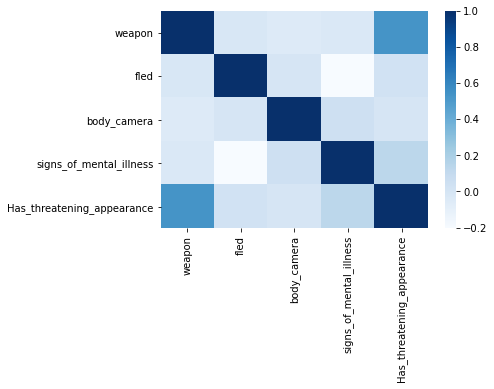

In [22]:
### No strong relationships were found
df['Has_threatening_appearance'] = np.where(df['threatening_appearance'] != 'No Threat',True,False)
df['weapon'] = np.where(df['true_weapon'] == 'weapons',True,False)
df['fled'] = np.where(df['flee'] != 'Not fleeing',True,False)
df['threat'] = np.where(df['threat_level'] == 'attack',True,False)
selected_columns = df[["weapon","fled","body_camera","signs_of_mental_illness","race","Has_threatening_appearance"]]
new_df = selected_columns.copy()
sns.heatmap(new_df.corr(),cmap='Blues')
new_df

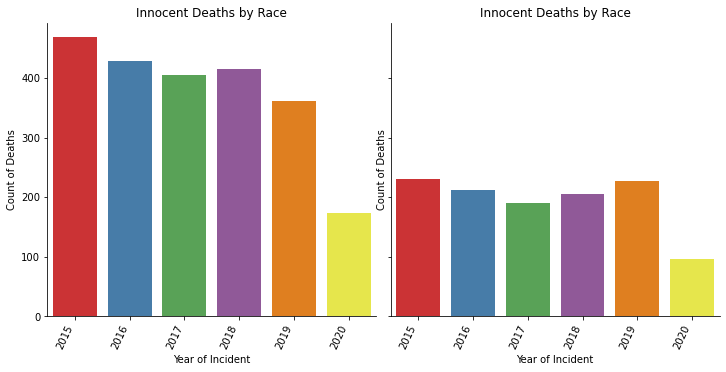

In [23]:
### Deaths of innocent White Americans seem to be decrease over the years, while deaths of Black Americans seem to hover in the 200's over the past 5 years
chart = sns.catplot(
    data=df[df['race'].isin(['Black', 'White'])],
    x='year',
    kind='count',
    palette='Set1',
    col='race',
    aspect=1,
)
chart.set(xlabel='Year of Incident', ylabel='Count of Deaths', title='Innocent Deaths by Race')
chart.set_xticklabels(rotation=65, horizontalalignment='right')


# Police Brutality by State

In [24]:
### Top states with deaths
state_count = df.groupby("state")
state_count = state_count["id"].count()
state_count = state_count.reset_index().rename(columns={"id":"count"}).sort_values(by = 'count', ascending=False)
state_count.head(10)

,state,count
4,CA,623
43,TX,383
9,FL,294
3,AZ,200
5,CO,153
10,GA,146
27,NC,137
36,OK,137
35,OH,133
42,TN,114


In [25]:
### Top 5 states experiencing police violence
state_year_count = df.groupby(["year","state"])
state_year_count = state_year_count["id"].count()
state_year_count = state_year_count.reset_index().rename(columns={"id":"count"}).sort_values(by = 'count', ascending=False)
top_3_state_year_count = state_year_count.loc[state_year_count.groupby('year')['count'].nlargest(3).reset_index()['level_1']]
top_3_state_year_count

### The state of California has the highest count of incidents when breaking down by year.

,year,state,count
4,2015,CA,165
42,2015,TX,92
9,2015,FL,58
54,2016,CA,116
93,2016,TX,70
59,2016,FL,52
105,2017,CA,128
142,2017,TX,49
110,2017,FL,47
154,2018,CA,85


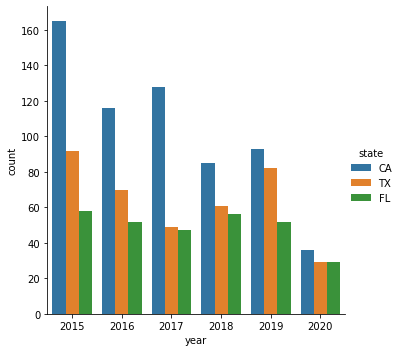

In [26]:
sns.catplot(x = "year",      
            y = "count",      
            hue = "state", 
            data = top_3_state_year_count,     
            kind = "bar")

In [27]:
### What is the percentage of incident against general population?
state_year_count = df.groupby(["year","state","race"])
state_year_count = state_year_count["id"].count()
state_year_count = state_year_count.reset_index().rename(columns={"id":"count"}).sort_values(by = 'count', ascending=False)
top_5_state_year_race = state_year_count.loc[state_year_count.groupby('year')['count'].nlargest(5).reset_index()['level_1']]
top_5_state_year_race


,year,state,race,count
11,2015,CA,Hispanic,70
13,2015,CA,White,50
103,2015,TX,White,43
10,2015,CA,Black,31
101,2015,TX,Hispanic,30
134,2016,CA,Hispanic,52
135,2016,CA,White,39
235,2016,TX,White,34
147,2016,FL,White,29
133,2016,CA,Black,21


In [28]:
df_population = pd.DataFrame({'race':['White','Black','Asian','Hispanic','Native American','Other'],'population':[0.601,0.134,0.059,0.185,0.013,0.008]})

df_population

,race,population
0,White,0.601
1,Black,0.134
2,Asian,0.059
3,Hispanic,0.185
4,Native American,0.013
5,Other,0.008


In [29]:
state_pop = pd.read_csv("/kaggle/input/population-usa-2018/Population_Distribution_by_Race_2018.csv")
state_pop= state_pop.fillna(0)
state_pop["Other"] = state_pop["Native Hawaiian/Other Pacific Islander"]+state_pop["Two Or More Races"]
state_pop = state_pop.drop(['Total','Native Hawaiian/Other Pacific Islander','Two Or More Races'],axis=1)
state_pop = state_pop.rename(columns={"American Indian/Alaska Native":"Native American"})
state_pop.head()


,Location,White,Black,Hispanic,Native American,Asian,Other
0,United States,192117000,38655700,58483600,2082800.0,17844800.0,9314500.0
1,Alabama,3115600,1257300,204800,19000.0,63800.0,90700.0
2,Alaska,426100,20700,50200,110300.0,43200.0,58500.0
3,Arizona,3815100,297000,2213600,271900.0,227200.0,179400.0
4,Arkansas,2110400,436900,224900,17000.0,44200.0,87900.0


In [44]:
state_2 = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

state_pop["Location"].replace(state_2, inplace=True)
state_pop.head()

,Location,White,Black,Hispanic,Native American,Asian,Other
0,United States,192117000,38655700,58483600,2082800.0,17844800.0,9314500.0
1,AL,3115600,1257300,204800,19000.0,63800.0,90700.0
2,AK,426100,20700,50200,110300.0,43200.0,58500.0
3,AZ,3815100,297000,2213600,271900.0,227200.0,179400.0
4,AR,2110400,436900,224900,17000.0,44200.0,87900.0


In [46]:
whole_pop = state_pop.melt(id_vars=["Location"], 
        var_name="race", 
        value_name="population")

whole_pop.head()

,Location,race,population
0,United States,White,192117000.0
1,AL,White,3115600.0
2,AK,White,426100.0
3,AZ,White,3815100.0
4,AR,White,2110400.0


In [49]:
new_df = top_5_state_year_race.merge(whole_pop, left_on=['state','race'], right_on=['Location','race']).drop('Location', 1)
new_df.head()

,year,state,race,count,population
0,2015,CA,Hispanic,70,15261300.0
1,2016,CA,Hispanic,52,15261300.0
2,2017,CA,Hispanic,61,15261300.0
3,2018,CA,Hispanic,38,15261300.0
4,2019,CA,Hispanic,35,15261300.0


In [52]:
new_df['pop_targeted']= (new_df['count']/new_df['population'])*100
new_df.head()

,year,state,race,count,population,pop_targeted
0,2015,CA,Hispanic,70,15261300.0,0.000459
1,2016,CA,Hispanic,52,15261300.0,0.000341
2,2017,CA,Hispanic,61,15261300.0,0.000400
3,2018,CA,Hispanic,38,15261300.0,0.000249
4,2019,CA,Hispanic,35,15261300.0,0.000229


# Analyzing the effectiveness of Body Cameras

In [34]:
### Do body cameras reduce police violence?
body_camera = pd.crosstab(df['body_camera'],df['threatening_appearance'])
body_camera.head()

threatening_appearance,Appears Threatening,No Threat
body_camera,,
False,3644,225
True,499,31


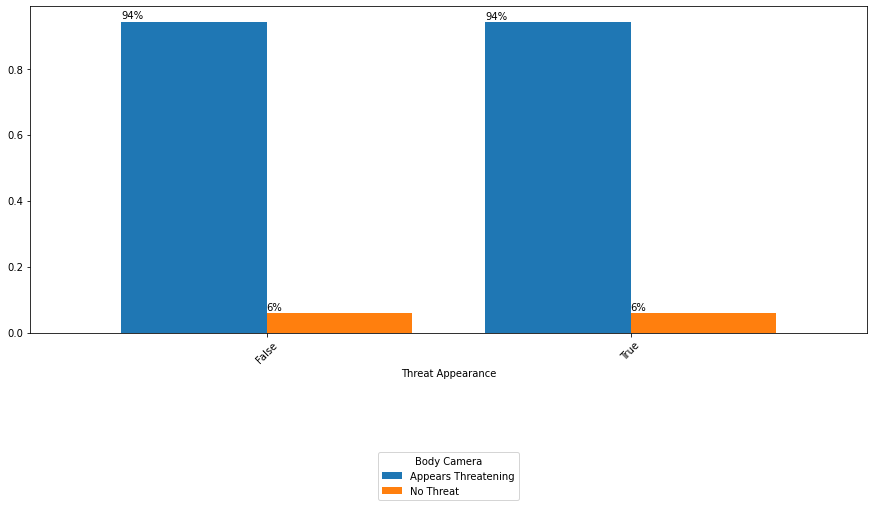

In [35]:
### 6% of all violent acts from the police are incidents recorded by a body camera. We do not see a reduction in violence in police officers who wear body cameras.

ax = (body_camera.div(body_camera.sum(1), axis=0)).plot(kind='bar',figsize=(15,6),width = 0.8)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))
plt.legend(title='Body Camera',loc=9, bbox_to_anchor=(.5, -0.35))

plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Threat Appearance')
plt.show()